In [12]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# PRODUCE STATISTICS
# We will use these functions to run our circuit and visualize its final state
from qiskit import Aer, execute 
from qiskit.visualization import *
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

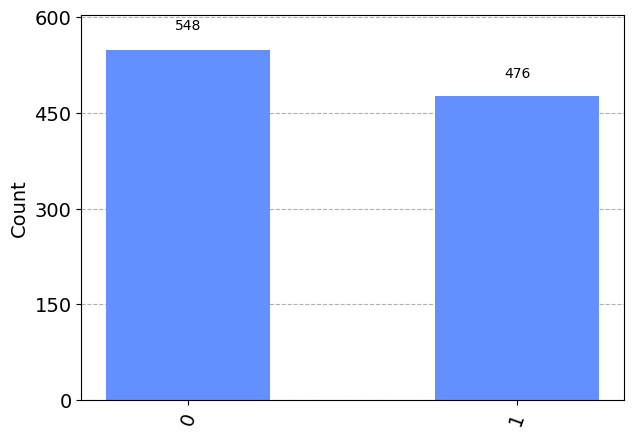

In [7]:
#Create a quantum circuit with 1 qubit and 1 classical bit.
#Add an H gate to qubit No.0.
#Measure results and show them on an histogram

# NOTE (1) : in order to print more than one images/ diagrams in the same executable box, 
#            write your statement whoever you would have written it if it was the only one, 
#            and then place in inside the "display(...)" function. 
#            For example, if your command is "<statement>", then write is as
#            display(<statement>)

# NOTE (2) : the Histogram shows possibilites of measuring all possible results
#            For N qubits, possible results are 2^N. 
#            Each digit (0 or 2) in a possible result that read from left to right
#            shows the value of qubits in reserse order. 
#            EXAMPLE (1): the "001" means q2 is "0", q1 is "0", q0 is "1"
#            EXAMPLE (2): the "111001" means q5 is "1", q4 is "1", q3 is "1", 
#                                            q2 is "0", q1 is "0", q0 is "1"

# ~~ MAKE CIRCUIT ~~
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

# ~~ PRODUCE STATISTICS ~~
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
# Make sure you change "qc" to the name of your quantum circuit on the line bellow!
job = execute(qc, backend = backend, shots = 1024)  
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

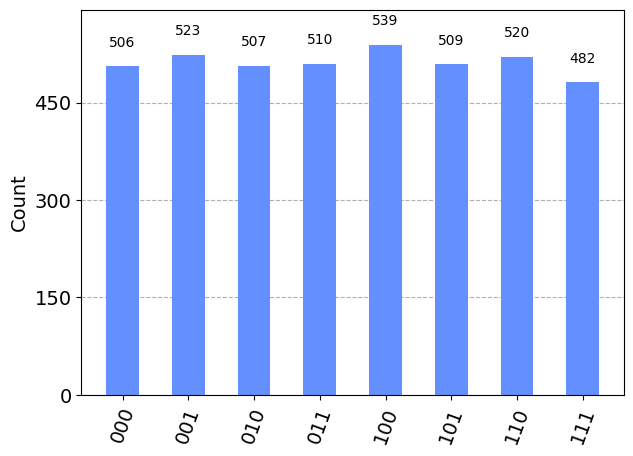

In [17]:
# Create a quantum circuit with 3 qubit and 3 bits.
# Add an H gate to alls.
# add qubits No. 0 and No. 2 an X gate for each, 
# Measure results and show them on an histogram
#       EXAMPLE (1): the "001" means q2 is "0", q1 is "0", q0 is "1"
#       EXAMPLE (2): the "111001" means q5 is "1", q4 is "1", q3 is "1", 
#                                       q2 is "0", q1 is "0", q0 is "1"

# NOTE: you can write multiple commands in one line, using the ";" symbol

# ~~ MAKE CIRCUIT ~~
qubits, bits = 3, 3
qc = QuantumCircuit(qubits, bits)
for i in range(qubits):
    qc.h(i)

qc.x(0); qc.x(1)                   #multiple commands in one line, seperated by ";"

for i in range(bits):
    qc.measure(i, i)

# ~~ PRODUCE STATISTICS ~~
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
# Make sure you change "qc" to the name of your quantum circuit on the line bellow!
job = execute(qc, backend = backend, shots = 4096)  
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

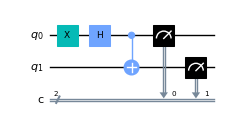

counts from 1st execution:  {'00': 495, '11': 529}


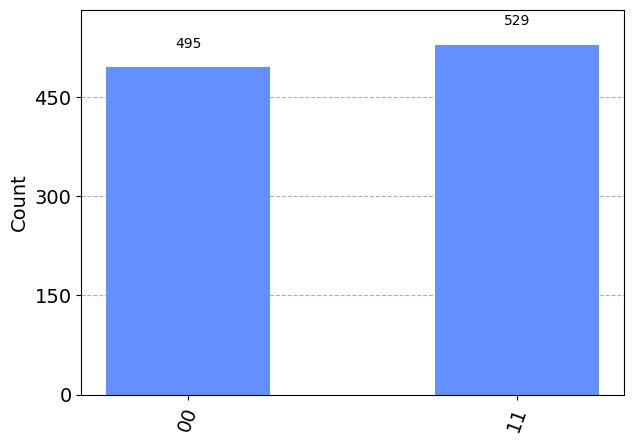

counts from 2nd execution:  {'00': 510, '11': 514}


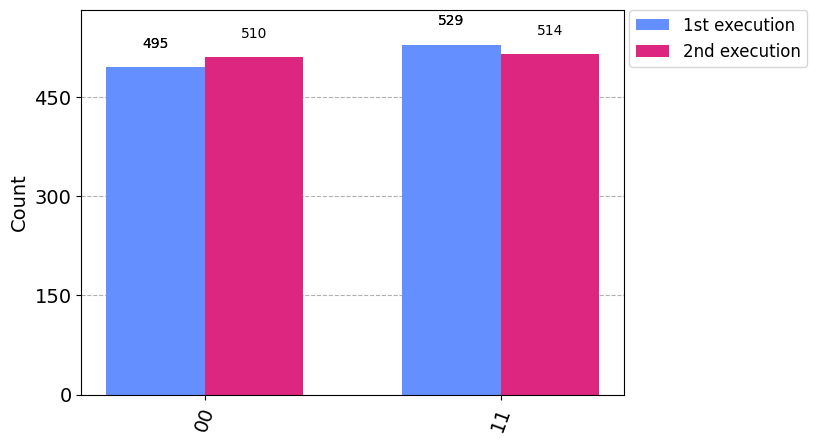

counts from 3rd execution:  {'00': 501, '11': 523}


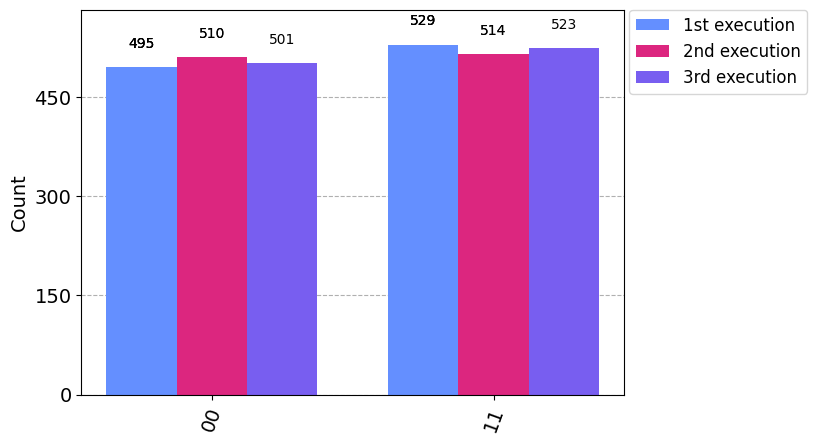

In [47]:
# Make a quantum circuit to simulate the Bell state: 
#    |output> = 1/sqrt(2) * ( |00> - |11> )
# using 2 qubits and 2 classical bits. 
# That requires to, first, put qubit No.0 on X gate, then an H gate, 
# then add to it an CNOT gate with qubit No. 1 as target. 
# ALSO, after making the circuit, 
# Do 1024 measurements, store them, do another 1024, store them, do a third 1024, store them, 
# and present them in one histogram. 

# NOTE (1) : By using histograms, we can make indivial "packages" of N measurements, 
#            store them, 
#            then do another K measurements, 
#            store them, 
#            so on. We can take those packages and present them in just one histogram, 
#            side by side. 


# CREATE CIRCUIT
minus_bell_state = QuantumCircuit(2, 2)
minus_bell_state.x(0)                        # Add gates to produce desired output
minus_bell_state.h(0)
minus_bell_state.cx(0, 1)
minus_bell_state.measure(0,0)                # Measure qubits
minus_bell_state.measure(1,1)
display(minus_bell_state.draw(scale=0.5))    # using the "display()" funtion to
                                             # support multiple graphical printing on screen
                                             # while running the same executable box


# CREATE STATISTICS RUNNING MANY TIMES EXPERIMENTS AND 
# COMRARING MANY ROUNDS OF MEASUREMENTS
# Each "round" has many measurements 
qc = minus_bell_state

# 1st statistics (for the first 1024 times to run experiment)
# --> by default, 1st execution has the color blue
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)   
counts1 = job.result().get_counts()
print("counts from 1st execution: ", counts1)
display(plot_histogram(counts1))

# 2nd statistics (for the second 1024 times to run experiment)
# --> by default, 2nd execution has the color pink
result2 = backend.run(transpile(qc, backend), shots=1024).result()
counts2  = result2.get_counts(qc)
print("counts from 2nd execution: ", counts2)
display(plot_histogram([counts1, counts2], legend= ['1st execution', '2nd execution']))

# 2nd statistics (for the second 1024 times to run experiment)
# --> by default, 3rd execution has the color purple
result3 = backend.run(transpile(qc, backend), shots=1024).result()
counts3  = result3.get_counts(qc)
print("counts from 3rd execution: ", counts3)

# Plot results with legend
plot_histogram([counts1, counts2, counts3], legend= ['1st execution', '2nd execution', '3rd execution'])

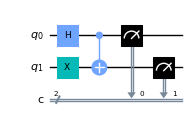

counts from 1st execution:  {'01': 546, '10': 478}
counts from 2nd execution:  {'01': 537, '10': 487}


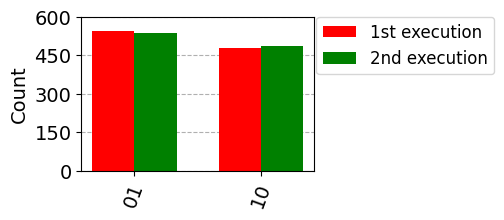

In [51]:
# Make a quantum circuit to simulate the Bell state: 
#    |output> = 1/sqrt(2) * ( |01> + |10> )
# which is, basically, a XOR gate for 2 inputs, 
# using 2 qubits and 2 classical bits. 
# That requires to, first, put qubit No.0 on X gate, then an H gate, 
# then add to it an CNOT gate with qubit No. 1 as target. 


# NOTE : The "plot_histogram(...)" function has many parameters to adjust graphical result. 
#        Its parameters/ options are (from left to right): 
#        -> counts : mandatory, a list of measurements
#                    If a list of K lists is given, then K bars will appear 
#                    for each possible measurement.
#        -> legend : optional, text to display above each package of measurement
#        -> sort : optional, is either "asc" or "desc", about the order of bars, 
#                  based on their height
#        -> figsize : a tuple in form (x,y) adjusting the size of final graph in inches 
#        -> color : string or list of string with constant/ basic color name 
#                   to adjust coloring of each package of measurement
#        -> bar_labels : either "True" or "False" to show (or not) precise number
#                        of measurements each bar has. 
#                        By default, it is set to True. 



# CREATE CIRCUIT
xor_bell_state = QuantumCircuit(2, 2)
xor_bell_state.h(0)                        # Add gates to produce desired output
xor_bell_state.x(1)
xor_bell_state.cx(0, 1)
xor_bell_state.measure(0,0)                # Measure qubits
xor_bell_state.measure(1,1)
display(xor_bell_state.draw(scale=0.5))


# CREATE STATISTICS RUNNING MANY TIMES EXPERIMENTS AND 
# COMRARING MANY ROUNDS OF MEASUREMENTS
# Each "round" has many measurements 
qc = xor_bell_state

# 1st statistics (for the first 1024 times to run experiment)
# --> by default, 1st execution has the color blue
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)   
counts1 = job.result().get_counts()
print("counts from 1st execution: ", counts1)

# 2nd statistics (for the second 1024 times to run experiment)
# --> by default, 2nd execution has the color pink
result2 = backend.run(transpile(qc, backend), shots=1024).result()
counts2  = result2.get_counts(qc)
print("counts from 2nd execution: ", counts2)
legend = ['1st execution', '2nd execution']
plot_histogram([counts1, counts2], legend=legend, sort='asc', figsize=(3,2),
               color=['red', 'green'], bar_labels=False)